In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import *
import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [83]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [84]:
sns.set(rc = {'figure.figsize':(30, 16)})
data = pd.read_csv('export.csv')

In [85]:
data = data[data['X'] >= 0]
data = data[data['Y'] >= 0]
data = data[data['X'] <= 4225]
data = data[data['Y'] <= 1560]

data = data[['X', 'Y', 'Eye movement type', 'Recording timestamp']]

dy = np.diff(data['Recording timestamp'])
dxX = np.diff(data['X'])
dxY = np.diff(data['Y'])

data.drop(0, inplace=True)
data['SPEED_DIFF_X'] = dxX / dy
data['SPEED_DIFF_Y'] = dxY / dy

Y = pd.get_dummies(data["Eye movement type"], prefix='movement').to_numpy()
X = data.drop(['Eye movement type'], axis=1).to_numpy()

In [86]:
X.shape, Y.shape

((9002, 5), (9002, 3))

In [87]:
X_sequences = []
Y_sequences = []

seq_length = 10

for i in range(seq_length, len(X)):

    if i + seq_length > len(X):
        break

    X_sequences.append(X[i-seq_length:i])
    Y_sequences.append(Y[i])

In [88]:
np.shape(X_sequences), np.shape(Y_sequences)

((8983, 10, 5), (8983, 3))

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_sequences, Y_sequences, test_size=0.25)

In [90]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))
# y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 3))

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))
# y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], 3))

np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test)

((6737, 10, 5), (6737, 3), (2246, 10, 5), (2246, 3))

In [91]:
model = Sequential()
model.add(LSTM(units=32, activation='relu', return_sequences=True, input_shape=(seq_length, 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=16, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['Accuracy'])

In [92]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 10, 32)            4864      
                                                                 
 dropout_12 (Dropout)        (None, 10, 32)            0         
                                                                 
 lstm_15 (LSTM)              (None, 16)                3136      
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 51        
                                                                 
Total params: 8,051
Trainable params: 8,051
Non-trainable params: 0
_________________________________________________________________


In [93]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=512)

Epoch 1/5


ValueError: in user code:

    File "c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 864, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 957, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 438, in update_state
        self.build(y_pred, y_true)
    File "c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 358, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(y_pred, self._get_metric_objects,
    File "c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 484, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 484, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 503, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\metrics.py", line 4262, in get
        return deserialize(str(identifier))
    File "c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\metrics.py", line 4218, in deserialize
        return deserialize_keras_object(
    File "c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: val_loss. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


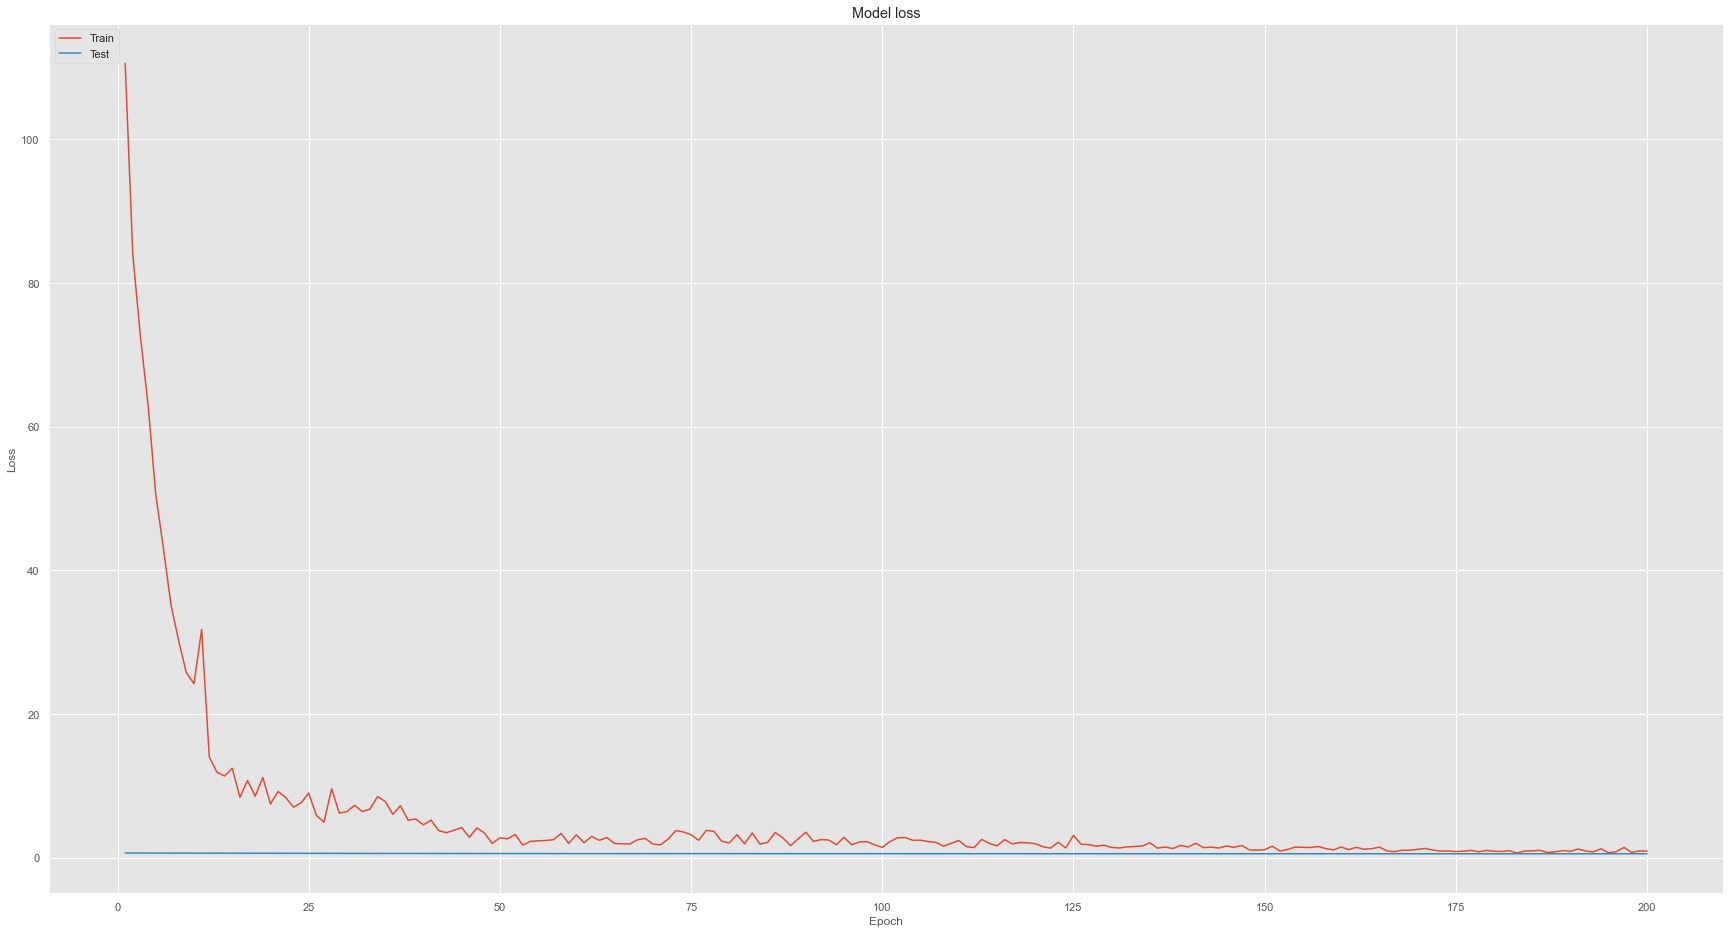

In [ ]:
plt.style.use("ggplot")

plt.plot(range(1,200+1),
         history.history['loss'])

plt.plot(range(1,200+1),
         history.history['val_loss'])


plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()